In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from math import ceil
from scipy import signal
from PIL import Image

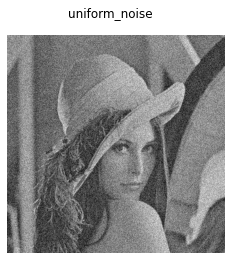

In [1]:
#1 Uniform Noise

img = mpimg.imread('images/Lenna_512.png')
rgb_weights = [0.2989, 0.5870, 0.1140]
img = np.dot(img[..., :3], rgb_weights)


def uniform_noise(main_image: np.ndarray, snr: float):
    """
    uniform Noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)

    # Generate uniform noise
    # noise = np.random.uniform(-255, 255, size=image.size)

    dimensions = len(main_image.shape)
    # print (dimensions)

    if dimensions == 3:
        nRows, nCols, _ = main_image.shape
        size = main_image.size
        noise = np.random.uniform(0, 255, size)
        element = 0

        for row in range(nRows):
            for col in range(nCols):
                # dimensions would be 1 in case of grey scale and 3 in case of RGB
                for dim in range(dimensions):
                    pixel_val = main_image[row, col, dim]

                    image[row][col][dim] = pixel_val * \
                        snr + noise[element] / 255 * (1-snr)

                    # image [row, col, dim] = pixel_val * snr + noise[element] * (1-snr)
                    # image [row, col, dim] = pixel_val + noise[element] /255
                    element = element + 1

    elif dimensions == 2:

        nRows, nCols = main_image.shape
        size = nRows*nCols
        noise = np.random.uniform(0, 255, size)

        element = 0

        for row in range(nRows):
            for col in range(nCols):

                pixel_val = main_image[row][col]
                image[row][col] = pixel_val * snr + \
                    noise[element] / 255 * (1-snr)
                # image [row, col] = pixel_val * snr + noise[element] * (1-snr)
                # image [row, col] = pixel_val + noise[element] /255
                element = element + 1

    return image


plt.imshow(uniform_noise(img, 0.65), cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("uniform_noise")
plt.show()


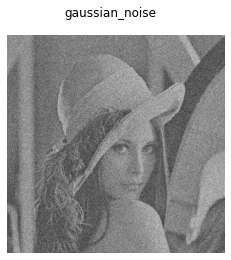

In [ ]:
#1 Gaussian Noise

def gaussian_noise(main_image: np.ndarray, sigma: float, snr: float):
    """
    Gaussian Noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    sigma: Noise Variance
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)

    dimensions = len(main_image.shape)

    # Generate Gaussian noise
    gauss = []
    element = 0

    for _ in range(main_image.size):
        # gauss.append(random.gauss(0, sigma))
        gauss.append(np.random.normal(0, sigma))

    if dimensions == 3:  # in case of RGB image
        nRows, nCols, _ = main_image.shape
        for row in range(nRows):
            for col in range(nCols):
                for dim in range(dimensions):
                    pixel_val = main_image[row, col, dim]
                    image[row, col, dim] = pixel_val * \
                        snr + gauss[element] * (1-snr)
                    element = element + 1

    elif dimensions == 2:  # in case of gray scale image
        nRows, nCols = main_image.shape

        for row in range(nRows):
            for col in range(nCols):
                pixel_val = main_image[row][col]
                image[row][col] = pixel_val * snr + gauss[element] * (1-snr)
                element = element + 1
    return image


plt.imshow(gaussian_noise(img, 1, 0.85), cmap=plt.get_cmap("gray"))
plt.suptitle("gaussian_noise")
plt.axis('off')
plt.show()


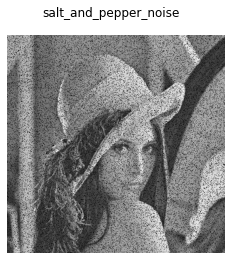

In [14]:
#1 Salt and Pepper Noise

def salt_and_pepper_noise(main_image: np.ndarray, snr: float):
    """
    Salt and Pepper noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)
    # image = main_image

    # random_num = random.randint(0,255)

    dimensions = len(image.shape)

    if dimensions == 2:
        nRows, nCols = image.shape

    elif dimensions == 3:
        nRows, nCols, _ = image.shape

    # number_of_pixels = ceil(nRows * nCols * dimensions * (100 - snr)/100)
    number_of_pixels = ceil(nRows * nCols * dimensions * (1-snr) / 10)

    # Randomly pick some pixels in the image for coloring them black
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord = random.randint(0, nRows - 1)

        # Pick a random x coordinate
        x_coord = random.randint(0, nCols - 1)

        # Color that pixel to black
        image[y_coord][x_coord] = 0

    # Randomly pick some pixels in the image for coloring them white
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord = random.randint(0, nRows - 1)

        # Pick a random x coordinate
        x_coord = random.randint(0, nCols - 1)

        # Color that pixel to black
        image[y_coord][x_coord] = 1

    return image

plt.imshow(salt_and_pepper_noise(img, 0.6), cmap=plt.get_cmap("gray"))
plt.suptitle("salt_and_pepper_noise")
plt.axis('off')
plt.show()


In [15]:
#2 Filtering

# Create Average Kernal with specified  size
def Create_Gaussian_filterKernal(Kernal_size, std):
    gkern1d = signal.gaussian(Kernal_size, std=std).reshape(Kernal_size, 1)
    Gaussian_Kernal = np.outer(gkern1d, gkern1d)
    return Gaussian_Kernal


# Create Average Kernal with specified  size
def Create_box_filterKernal(Kernal_size):
    return np.ones((Kernal_size, Kernal_size), np.float32) / (Kernal_size * Kernal_size)

# Get Median Value of an array
def get_median(array):
    for i in range(len(array)):
        key = array[i]
        j = i-1

#Sorting An array by Move elements of arr[0..i-1], that are greater than key, to one position aheadof their current position
        while(j >= 0 and (array[j] > key)):
            array[j+1] = array[j]
            j = j-1
        array[j + 1] = key
        
# Return the median value after sorting
    return array[int((len(array)/2)+.5)-1]


In [16]:
#2 Filtering

def Convolution(image,kernal):
    pixel_value=0
    image_array = np.array(image)
    rows, columns = image_array.shape
    Krows,kcolumns=kernal.shape
    new_image=np.ones([rows-(Krows-1), columns-(kcolumns-1)],dtype=np.float32)
# For Moving Window
    for i in range(rows-( Krows-1)):
        for j in range(columns-(kcolumns-1)):
            V_index=0
            U_index=0
# For convolving with kernals depening on their selected size
            for rp in range (i,i+ Krows):
                for cp in range (j,j+kcolumns):
                    pixel_value=pixel_value+image_array[rp][cp]*kernal[U_index][V_index]
                    V_index+=1
                V_index=0
                U_index+=1
            U_index=0
            new_image[i][j]=pixel_value
            pixel_value=0
    return new_image

def normalization(image):
    norm = (image - np.min(image)) / (np.max(image) - np.min(image))*255
    return norm


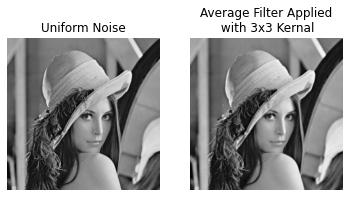

In [17]:
# Applying Average Filter
def Average_Filter(image, Kernal_size):
    kernal = Create_box_filterKernal(Kernal_size)
    new_image = Convolution(image, kernal)
    norm = normalization(new_image)
    return (Image.fromarray(norm))

Uniform_Noise_Image = uniform_noise(img, 0.65)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(Uniform_Noise_Image, cmap=plt.get_cmap("gray"))
plt.title("Uniform Noise")
plt.axis('off')

AVG_Filterd_image = Average_Filter(Uniform_Noise_Image, 3)
fig.add_subplot(1, 2, 2)
plt.imshow(AVG_Filterd_image, cmap='gray')
plt.axis('off')
plt.title("Average Filter Applied\n with 3x3 Kernal")
plt.show()



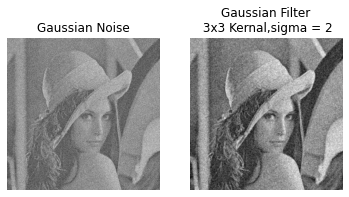

In [ ]:

# Applying Gaussian Filter
def Gaussian_Filter(image, Kernal_size, std):
    kernal = Create_Gaussian_filterKernal(Kernal_size, std)
    new_image = Convolution(image, kernal)
    norm = normalization(new_image)
    return (Image.fromarray(norm))


Gaussian_Noise_image = gaussian_noise(img, 1, 0.85)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(Gaussian_Noise_image, cmap='gray')

plt.axis('off')
plt.title("Gaussian Noise")

Gaussian_Filterd_image = Gaussian_Filter(Gaussian_Noise_image, 3, 2)
fig.add_subplot(1, 2, 2)
plt.imshow(Gaussian_Filterd_image, cmap='gray')
plt.axis('off')
plt.title("Gaussian Filter\n 3x3 Kernal,sigma = 2")
plt.show()


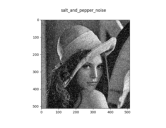

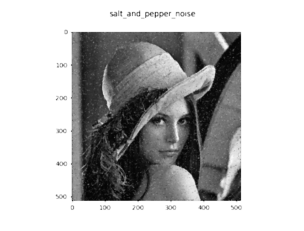

In [ ]:
# Applying Median Filter 
def Median_Filter(image,Kernal_size):
        window_data=[]
        image_arr=np.array(image)
        rows, columns = image_arr.shape
        new_image=np.ones([rows-(Kernal_size-1), columns-(Kernal_size-1)], dtype = int)
# For Moving Window
        for i in range(rows-(Kernal_size-1)):
            for j in range(columns-(Kernal_size-1)):
                # For convolving with kernals depening on their selected size
                for rp in range (i,i+Kernal_size):
                      for cp in range (j,j+Kernal_size):
                            window_data.append(image_arr[rp][cp])
# median_value=get_median(window_data)
                new_image[i][j]=get_median(window_data) 
                window_data=[]   
        return (Image.fromarray(new_image))

fig = plt.figure()
# opening image using pil and converting image to GrayScale 
salt_papper_Noisy_image = Image.open("images/Figure_3.png").convert('L')
# Adds a Noisy Img at the 1st position
fig.add_subplot(1,2,1)
plt.imshow(salt_papper_Noisy_image ,cmap='gray')
plt.axis('off')
# plt.title(" Salt&paper Noise ")
plt.show()

# Filter Image
Median_Filterd_image=Median_Filter(salt_papper_Noisy_image ,3)
fig.add_subplot(1,2,2)
plt.imshow(Median_Filterd_image,cmap='gray')
plt.axis('off')
# plt.title("Median Filter Applied")
plt.show() 


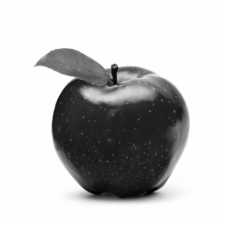

In [59]:
apple_image = Image.open("images/apple_gray.png").convert('L')
plt.imshow(apple_image, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
#3 Edge Detection
X_kernel = (np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]]
                    ))

Y_kernel = (np.array([[-1, -2, -1],
                      [0,  0,   0],
                      [1,  2,  1]]
                      ))

XY_kernel = (np.array([[-2, -2, 0],
                       [-2, 0,  2],
                       [0,  0,  2]]
                       ))

outline = np.array([
                    [-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]]
                    )


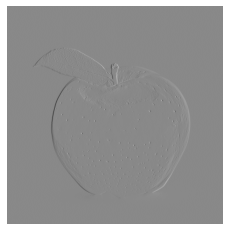

In [60]:
def Sobel_X(img: np.array) -> np.array:
    imgx = Convolution(img, X_kernel)
    return imgx


plt.imshow(Sobel_X(apple_image), cmap='gray')
plt.axis('off')
plt.show()


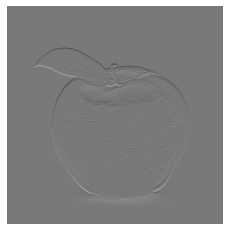

In [61]:
def Sobel_Y(img: np.array) -> np.array:
    imgy = Convolution(img, Y_kernel)
    return imgy


plt.imshow(Sobel_Y(apple_image), cmap='gray')
plt.axis('off')
plt.show()


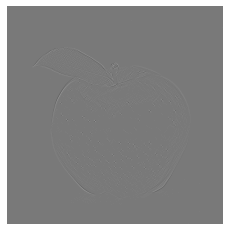

In [62]:
def Sobel_XY(img: np.array) -> np.array:
    imgx = Convolution(img, X_kernel)
    imgxy = Convolution(imgx, Y_kernel)
    return imgxy


plt.imshow(Sobel_XY(apple_image), cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
roberts_cross_v = np.array([[-1, 0], [0, 1]])
roberts_cross_h = np.array([[0, -1], [1, 0]])

In [ ]:
def Robert_Mask(img: np.array) -> np.array:
    vertical = Convolution(img, roberts_cross_v)
    horizontal = Convolution(img, roberts_cross_h)
    robert_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    return robert_img
    # cv2.imwrite('robert_img.jpg', robert_img)


In [ ]:
def Prewitt_Mask(img: np.array):

    pre_x = Convolution(img, Hx) / 6.0
    pre_y = Convolution(img, Hy) / 6.0
    #calculate the gradient magnitude of vectors
    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
    # mapping values from 0 to 255
    pre_out = (pre_out / np.max(pre_out)) * 255
    return pre_out
    # cv2.imwrite('prewitt_image.jpg', pre_out)


In [50]:
Hx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Hy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
pre = Prewitt_Mask(apple_image)
robert = Robert_Mask(apple_image)


In [51]:
def gradient_mag(fx, fy):
    grad_mag = np.hypot(fx, fy)
    return grad_mag/np.max(grad_mag)


In [52]:
# the closest direction
def closest_dir_function(grad_dir):
    closest_dir_arr = np.zeros(grad_dir.shape)
    for i in range(1, int(grad_dir.shape[0] - 1)):
        for j in range(1, int(grad_dir.shape[1] - 1)):

            if ((grad_dir[i, j] > -22.5 and grad_dir[i, j] <= 22.5) or (
                    grad_dir[i, j] <= -157.5 and grad_dir[i, j] > 157.5)):
                closest_dir_arr[i, j] = 0

            elif ((grad_dir[i, j] > 22.5 and grad_dir[i, j] <= 67.5) or (
                    grad_dir[i, j] <= -112.5 and grad_dir[i, j] > -157.5)):
                closest_dir_arr[i, j] = 45

            elif ((grad_dir[i, j] > 67.5 and grad_dir[i, j] <= 112.5) or (
                    grad_dir[i, j] <= -67.5 and grad_dir[i, j] > -112.5)):
                closest_dir_arr[i, j] = 90

            else:
                closest_dir_arr[i, j] = 135

    return closest_dir_arr


In [53]:
###Canny


#Convert to thinned edge
def non_maximal_suppressor(grad_mag, closest_dir):
    thinned_output = np.zeros(grad_mag.shape)
    for i in range(1, int(grad_mag.shape[0] - 1)):
        for j in range(1, int(grad_mag.shape[1] - 1)):

            if (closest_dir[i, j] == 0):
                if ((grad_mag[i, j] > grad_mag[i, j + 1]) and (grad_mag[i, j] > grad_mag[i, j - 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            elif (closest_dir[i, j] == 45):
                if ((grad_mag[i, j] > grad_mag[i + 1, j + 1]) and (grad_mag[i, j] > grad_mag[i - 1, j - 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            elif (closest_dir[i, j] == 90):
                if ((grad_mag[i, j] > grad_mag[i + 1, j]) and (grad_mag[i, j] > grad_mag[i - 1, j])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            else:
                if ((grad_mag[i, j] > grad_mag[i + 1, j - 1]) and (grad_mag[i, j] > grad_mag[i - 1, j + 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

    return thinned_output / np.max(thinned_output)


In [54]:
#Function to include weak pixels that are connected to chain of strong pixels
def DFS(img):
    for i in range(1, int(img.shape[0] - 1)):
        for j in range(1, int(img.shape[1] - 1)):
            if(img[i, j] == 1):
                t_max = max(img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j-1],
                            img[i, j+1], img[i+1, j-1], img[i+1, j], img[i+1, j+1])
                if(t_max == 2):
                    img[i, j] = 2


In [55]:
#Hysteresis Thresholding
def hysteresis_thresholding(img):
    low_ratio = 0.10
    high_ratio = 0.30
    diff = np.max(img) - np.min(img)
    t_low = np.min(img) + low_ratio * diff
    t_high = np.min(img) + high_ratio * diff

    temp_img = np.copy(img)
    for i in range(1, int(img.shape[0] - 1)):
        for j in range(1, int(img.shape[1] - 1)):
            # Strong pixels
            if (img[i, j] > t_high):
                temp_img[i, j] = 2
            # Weak pixels
            elif (img[i, j] < t_low):
                temp_img[i, j] = 0
            # Intermediate pixels
            else:
                temp_img[i, j] = 1
        total_strong = np.sum(temp_img == 2)

        while (1):
          DFS(temp_img)
          if (total_strong == np.sum(temp_img == 2)):
              break

          total_strong = np.sum(temp_img == 2)

     # Remove weak pixels
        for i in range(1, int(temp_img.shape[0] - 1)):
            for j in range(1, int(temp_img.shape[1] - 1)):
                if (temp_img[i, j] == 1):
                    temp_img[i, j] = 0

        temp_img = temp_img / np.max(temp_img)
        return temp_img
    
    # N_img = cv2.imread('/content/lena_gray.png')
    # G_img = cv2.cvtColor(N_img, cv2.COLOR_BGR2GRAY)  # flage=0 for gray scale
    # B_img = cv2.GaussianBlur(G_img, (3, 3), 0)


In [56]:
def Canny_Mask(img: np.array):
    #Find gradient Fx
    x_grad = Convolution(img, X_kernel)
    # Find gradient Fy
    y_grad = Convolution(img, Y_kernel)
    # Compute edge strength
    grad_mag = gradient_mag(x_grad, y_grad)
    # Compute direction of gradient
    grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
    # Phase 2 : Non maximal suppression
    closest_dir = closest_dir_function(grad_dir)
    thinned_output = non_maximal_suppressor(grad_mag, closest_dir)
    # # Phase 3 : Hysteresis Thresholding
    output_img = hysteresis_thresholding(thinned_output)
    # cv2.imwrite('canny.jpg', output_img)
    return output_img

In [66]:
cannny = Canny_Mask(img)

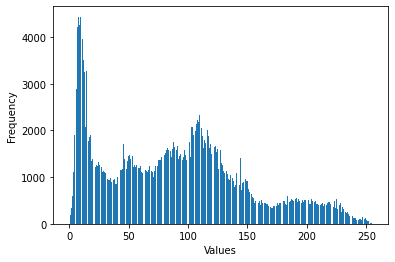

In [18]:
#4 Histogram
lena_image = np.asarray(Image.open("images/lena_gray.png").convert("L"))

def Histogram(image : np.array):
    values = [0]*256
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            values[image[i, j]] += 1

    return values


x = np.linspace(0, 255, num=256)

histogram = Histogram(lena_image)
plt.bar(x, histogram)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()


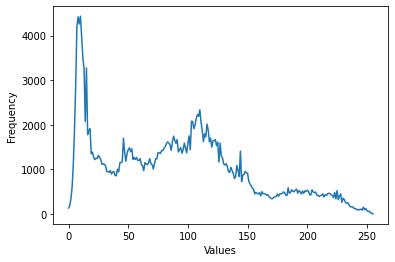

In [19]:
#4 Distripution curve
plt.plot(x, histogram)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.show()


In [2]:
# Compute the distribution function (cumulative curve)
def cumhist(histogram):
    cumhistogram = []
    cumhistogram.append(histogram[0])
    for i in range(1, 256):
        cumhistogram.append(histogram[i] + cumhistogram[i - 1])
    cumhistogram = np.array(cumhistogram)
    nj = (cumhistogram - cumhistogram.min()) * 255
    N = cumhistogram.max() - cumhistogram.min()

    cum_curv = nj/N

    return cum_curv

In [6]:
#6 Equalize the image

def Equalize(input_image):
    
    image = input_image.copy();
    image = np.asarray(image) 
    hist = np.bincount(image.flatten(), minlength=256)
    n_pixels = np.sum(hist)
    hist = hist / n_pixels
    cdf = np.cumsum(hist)
    cdf_m = np.floor(255 * cdf).astype(np.uint8)
    img_list = list(image.flatten())
    
    eq_img_list = [cdf_m[p] for p in img_list]
        
    result = np.reshape(np.asarray(eq_img_list), image.shape)
    
    return result

In [23]:
img = cv.imread("images/Lenna_512.png",0)
Equal_image = Equalize(img)
histogram1 = Histogram(img)
histogram2 = Histogram(Equal_image)

NameError: name 'cv' is not defined

Text(0.5, 1.0, 'equalized_image')

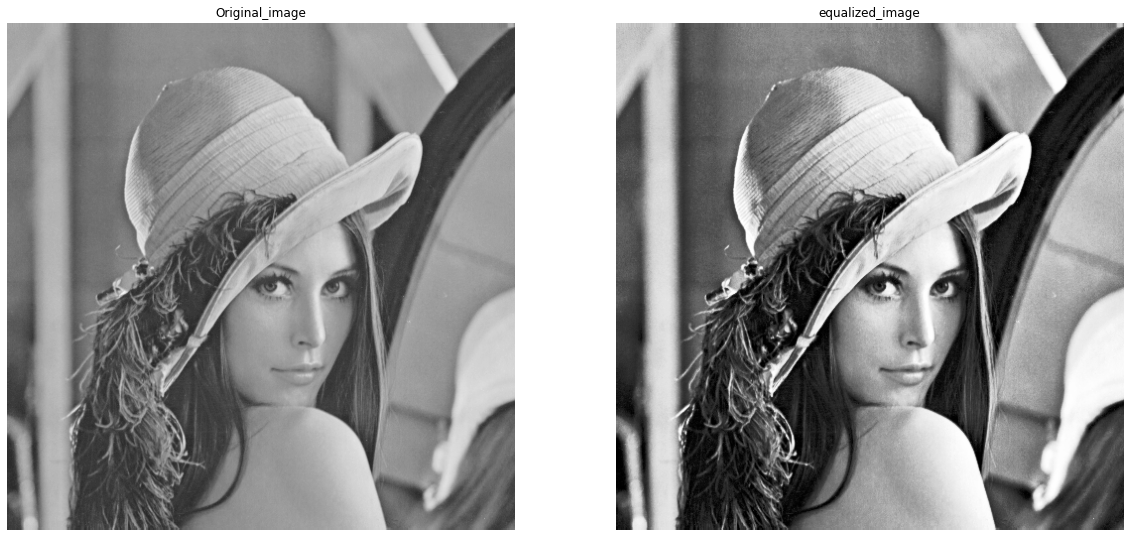

In [26]:
x = np.linspace(0, 255, num=256)
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1,2,1)
plt.imshow(img ,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original_image")

fig.add_subplot(1,2,2)
plt.imshow(Equal_image ,cmap='gray')
plt.axis('off')
plt.title("equalized_image")

In [4]:
#6 Normalize the image

def normalize_images(images):
    # initial zero ndarray
    normalized_images = np.zeros_like(images.astype(float))

    # The first images index is number of images where the other indices indicates
    # hieight, width and depth of the image
    num_images = images.shape[0]

    # Computing the minimum and maximum value of the input image to do the normalization based on them
    maximum_value, minimum_value = images.max(), images.min()

    # Normalize all the pixel values of the images to be from 0 to 1
    for img in range(num_images):
        normalized_images[img, ...] = (
            images[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)

    return normalized_images


Text(0.5, 1.0, 'Normalized Image')

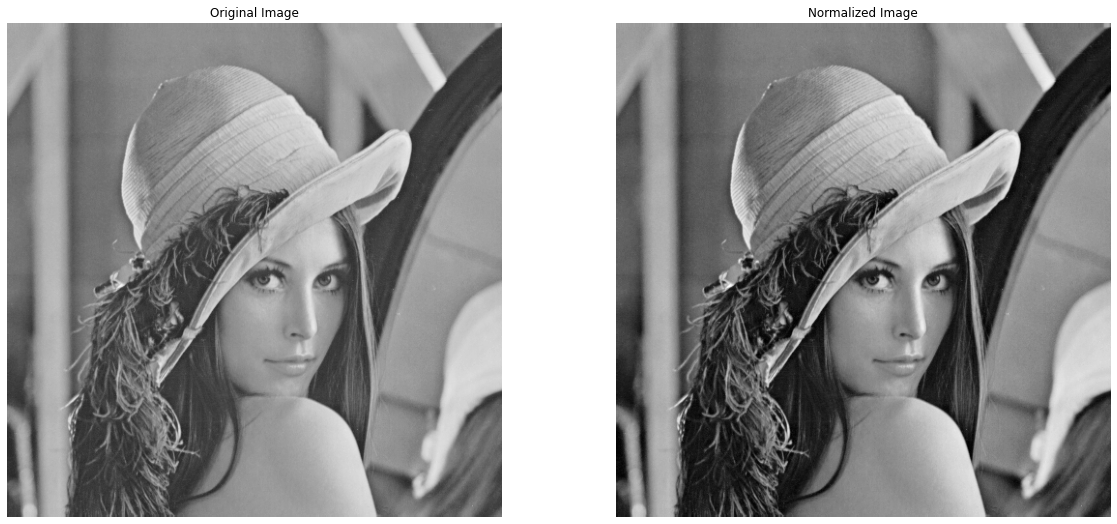

In [27]:
img = cv2.imread('images/Lenna_512.png', 0)
normalized_img = normalize_images(img)

# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original Image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
arr = np.asarray(normalized_img)
plt.imshow(arr, cmap='gray')
plt.axis('off')
plt.title("Normalized Image")


In [132]:
#7 GLobal and Local thersholding

"""convert image from color to grayscale"""

hand_img = mpimg.imread('images/h.jpeg')
rgb_weights = [0.2989, 0.5870, 0.1140]

hand_img = np.dot(hand_img[..., :3], rgb_weights)


In [133]:
def global_threshold(main_image: np.ndarray, threshold=None):
    """
    Global threshold
    main_image: Image to add noise to
    
    return: Image after threshold
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)

    max = 255
    min = 0
    if threshold is None:
        threshold = 100
    nRows, nCols = main_image.shape

    for row in range(nRows):
        for col in range(nCols):
            if image[row][col] > threshold:
                image[row][col] = max
            elif image[row][col] < threshold:
                image[row][col] = min

    return image


In [134]:
def local_threshold(input_img, threshold=None):
    """
    Local threshold
    using Bradley-Roth Adaptive Thresholding Algorithm
    main_image: Image to add noise to
    thresh: specific threshold
    
    return: Image after threshold
    """

    nRows, nCols = input_img.shape
    # Default window size is round(nCols/8)
    #S = nCols/8
    S = nCols/24

    s2 = S/2
    # Compute integral image
    integral_img = np.zeros_like(input_img, dtype=np.uint32)
    for col in range(nCols):
        for row in range(nRows):
            integral_img[row, col] = input_img[0:row, 0:col].sum()
    # Default threshold is 15% of the total
    # area in the window
    if threshold is None:
        threshold = 15.0

    #output img
    out_img = np.zeros_like(input_img)

    for col in range(nCols):
        for row in range(nRows):
            #SxS region
            # Access the four corners of each neighbourhood
            # And ensure no coordinates are out of bounds
            y0 = int(max(row-s2, 0))
            y1 = int(min(row+s2, nRows-1))
            x0 = int(max(col-s2, 0))
            x1 = int(min(col+s2, nCols-1))
            # Count how many pixels are in each neighbourhood
            count = (y1-y0)*(x1-x0)
            # Compute areas of each window
            #sum_ = integral_img[y1, x1]-integral_img[y0, x1]-integral_img[y1, x0]+integral_img[y0, x0]
            sum_ = int(integral_img[y1, x1])-int(integral_img[y0, x1]) - \
                int(integral_img[y1, x0])+int(integral_img[y0, x0])

            if input_img[row, col]*count < sum_*(100.-threshold)/100.:
                out_img[row, col] = 0
            else:
                out_img[row, col] = 255

    return out_img


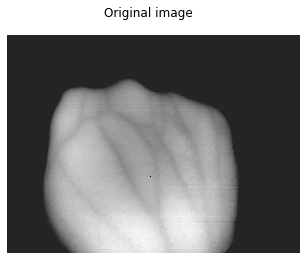

In [135]:
plt.imshow(hand_img, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Original image")
plt.show()


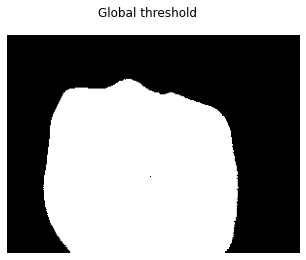

In [136]:
plt.imshow(global_threshold(hand_img, 50), cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Global threshold")
plt.show()


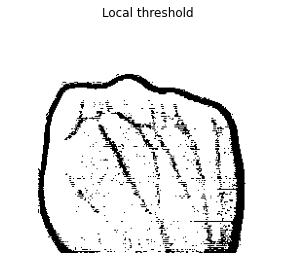

In [137]:
plt.imshow(local_threshold(hand_img, 3), cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.suptitle("Local threshold")
plt.show()


In [157]:
#8 Transformation from color to gray scale image
def rgb2gray(rgb_image):
    return np.dot(rgb_image[..., :3], [0.299, 0.587, 0.114])


def view_img(gray_scale: bool):
  # create figure
  fig = plt.figure(figsize=(10, 15))

  if gray_scale == True:
    plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
    plt.title("Gray Scale Image")

  else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original RGB Image")


In [158]:
# Compute RGB Histogram and plot it
def Histogram_Computation(Image):

	Image_Height = Image.shape[0]
	Image_Width = Image.shape[1]
	Image_Channels = Image.shape[2]

	Histogram = np.zeros([256, Image_Channels], np.int32)

	for x in range(0, Image_Height):
		for y in range(0, Image_Width):
			for c in range(0, Image_Channels):
				Histogram[Image[x, y, c], c] += 1

	return Histogram


def Plot_Histogram(Histogram):
	plt.figure()
	plt.title("Color Image Histogram")
	plt.xlabel("Intensity Level")
	plt.ylabel("Intensity Frequency")
	plt.xlim([0, 256])
	plt.plot(Histogram[:, 0], 'b')  # This is to Plot Blue Channel with Blue Color
	# This is to Plot Green Channel with Green Color
	plt.plot(Histogram[:, 1], 'g')
	plt.plot(Histogram[:, 2], 'r')  # This is to Plot Red Channel with Red Color


In [160]:
# Plot R, G and B histograms
def plot_rgb_histograms(color: str):
  red_list, green_list, blue_list = [], [], []
  xlist = range(0, 256)

  for i in range(0, 256):
      red_list.append(Histogram[i, 2])
      green_list.append(Histogram[i, 1])
      blue_list.append(Histogram[i, 0])

  plt.xlabel("Intensity Level")
  plt.ylabel("Intensity Frequency")

  if(color == 'red'):
    plt.bar(xlist, red_list, color="red")
    plt.title("Red Histogram")

  elif(color == 'green'):
    plt.bar(xlist, green_list, color="green")
    plt.title("Green Histogram")

  elif(color == 'blue'):
    plt.bar(xlist, blue_list, color="blue")
    plt.title("Blue Histogram")


In [161]:
# Plot R, G and B cumulative curves
def plot_rgb_cumhist(color: str):
  red_cumhist, green_cumhist, blue_cumhist = [], [], []
  xlist = range(0, 256)

  for i in range(0, len(cumhistogram)):
      red_cumhist.append(cumhistogram[i][2])
      green_cumhist.append(cumhistogram[i][1])
      blue_cumhist.append(cumhistogram[i][0])

  if(color == 'red'):
    plt.bar(xlist, red_cumhist, color="red")
    plt.title("Red Cumulative Curve")

  elif(color == 'green'):
    plt.bar(xlist, green_cumhist, color="green")
    plt.title("Green Cumulative Curve")

  elif(color == 'blue'):
    plt.bar(xlist, blue_cumhist, color="blue")
    plt.title("Blue Cumulative Curve")

  else:
    plt.plot(xlist, red_cumhist, color="red")
    plt.plot(xlist, green_cumhist, color="green")
    plt.plot(xlist, blue_cumhist, color="blue")
    plt.title("Cumulative Curve")


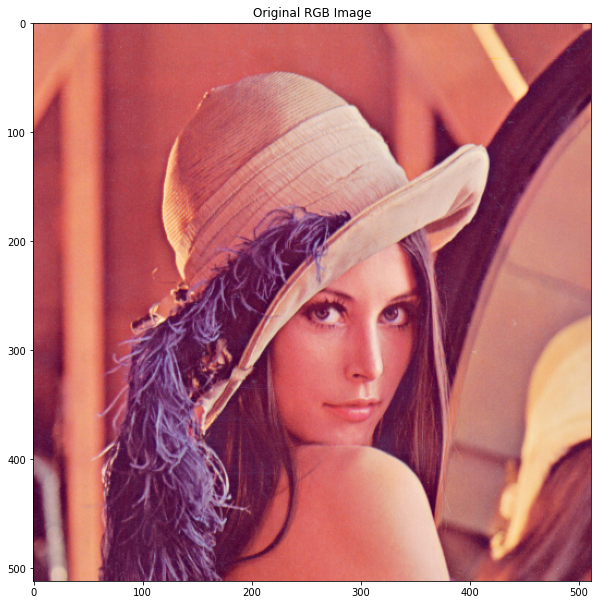

In [162]:
# Read a color image and convert it to gray-scale image
img = cv2.imread("images/Lenna_512.png")  # This will read a color Images

gray_img = rgb2gray(img)

view_img(gray_scale=False)


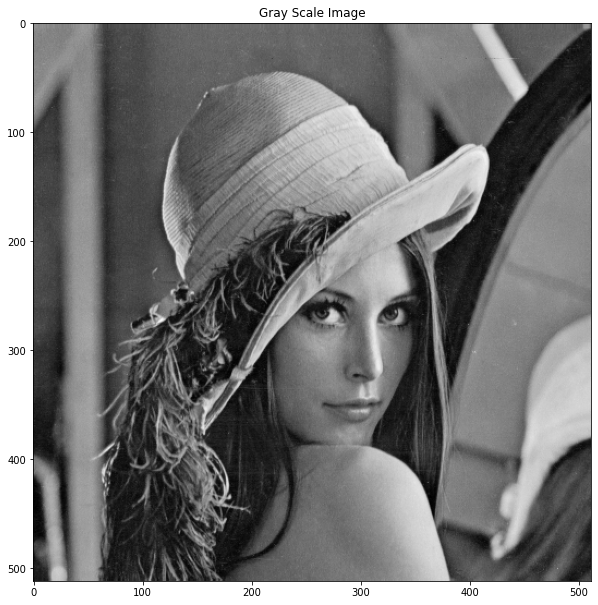

In [163]:
view_img(gray_scale=True)


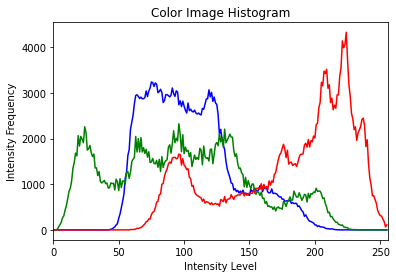

In [164]:
Histogram = Histogram_Computation(img)

Plot_Histogram(Histogram)


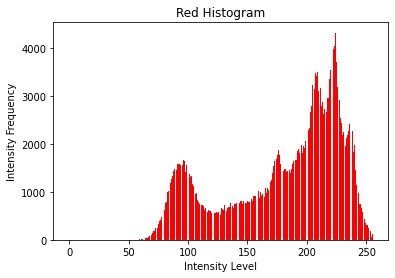

In [165]:
plot_rgb_histograms('red')


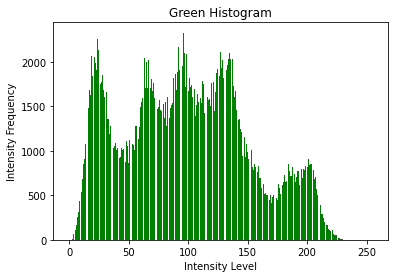

In [166]:
plot_rgb_histograms('green')


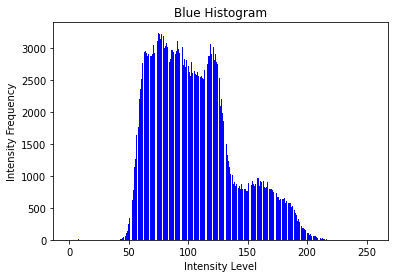

In [167]:
plot_rgb_histograms('blue')


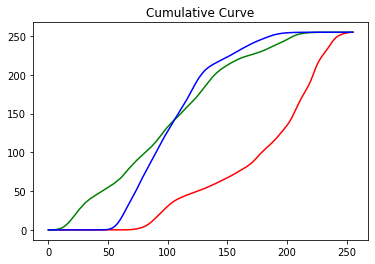

In [168]:
# draw cumulative curve
cumhistogram = cumhist(Histogram)
plot_rgb_cumhist('rgb')


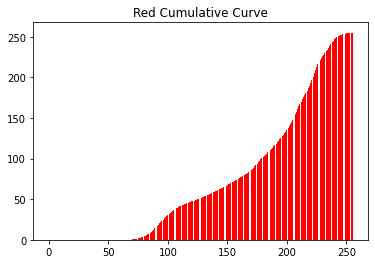

In [169]:
plot_rgb_cumhist('red')


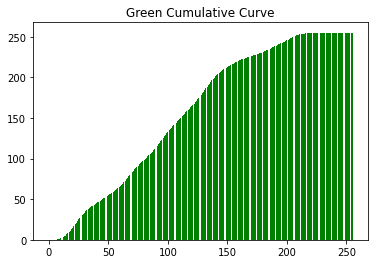

In [170]:
plot_rgb_cumhist('green')


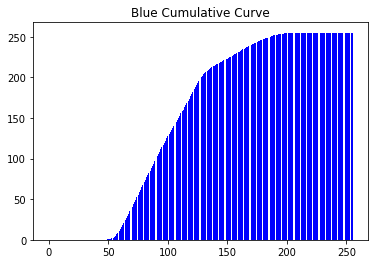

In [171]:
plot_rgb_cumhist('blue')


In [39]:
#  Ideal Low Pass Filtering
def lowPassFiltering(img,Filter_size):
    
    img_dft = np.fft.fft2(img)
    img_dft_shift =  np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle
    
    #Getting image properties
    height, width = img_dft_shift.shape[0:2]
    
    #Find the center point of the Fourier spectrum to apply filter Filter in right position
    center_x,center_y = int( height/2), int(width/2)
    
    #Define a blank black image with the same size as the FFT Image
    mask_img = np.zeros((height, width), np.uint8)
    
    #Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 1, preserving the low frequency part
    mask_img[center_x-int(Filter_size/2):center_x+int(Filter_size/2), center_y-int(Filter_size/2):center_y+int(Filter_size/2)] = 1
    fft_new_img=mask_img*img_dft_shift #A low-pass filter is obtained by multiplying the defined low-pass filter with the incoming Fourier spectrogram one-to-one.
    
    # Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(fft_new_img)  # Move the frequency domain from the middle to the upper left corner
    new_img = np.fft.ifft2(idft_shift)  # Fourier inverse function 
    new_img = np.abs(new_img)
    return new_img



In [40]:
# Ideal High Pass Filtering
def HighPassFiltering(img,Filter_size):

    img_fft = np.fft.fft2(img)
    img_fft_shift =  np.fft.fftshift(img_fft)  # Move frequency domain from upper left to middle
    
    #Getting image properties
    height, width = img_fft_shift.shape[0:2]
    
    #Define a blank black image with the same size as the FFT Image
    mask_img = np.ones((height, width), np.uint8)
   
    #Find the center point of the Fourier spectrum to apply filter Filter in right position
    center_x,center_y = int( height/2), int(width/2)
    mask_img[center_x-int(Filter_size/2):center_x+int(Filter_size/2), center_y-int(Filter_size/2):center_y+int(Filter_size/2)] = 0#Center point plus or minus half of the filter size, forming a filter size that defines the size, then set to 0    
    new_fft_img=mask_img*img_fft_shift
    
    # Inverse Fourier Transform
    ifft_shift = np.fft.ifftshift(new_fft_img)  # Move the frequency domain from the middle to the upper left corner
    new_img = np.fft.ifft2(ifft_shift)  # Fourier inverse function 
    new_img = np.abs(new_img)
    return new_img

Text(0.5, 1.0, 'Low pass filter')

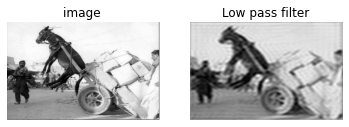

In [41]:
fig = plt.figure()
image= Image.open("images/img5.png").convert('L')

fig.add_subplot(1,2,1)
plt.imshow(image ,cmap='gray')
plt.axis('off')
plt.title("image ")


# Low-pass filter
lowpass_filtered_img= lowPassFiltering(image,55)
fig.add_subplot(1,2,2)
plt.imshow(lowpass_filtered_img,cmap='gray')
plt.axis('off')
plt.title("Low pass filter")


Text(0.5, 1.0, 'High pass filter')

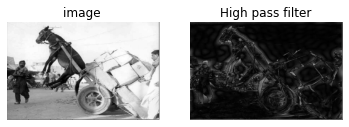

In [42]:

fig2 = plt.figure()
fig2.add_subplot(1,2,1)
plt.imshow(image ,cmap='gray')
plt.axis('off')
plt.title("image ")

# High-pass filter
Highpass_filtered_img= HighPassFiltering(image,20)
fig2.add_subplot(1,2,2)
plt.imshow(Highpass_filtered_img,cmap='gray')
plt.axis('off')
plt.title("High pass filter")


In [49]:
#hybrid images 
def hybrid_image(img1 ,img2):

  min_shape =(min(img1.size[0], img2.size[0]),
              min(img1.size[1], img2.size[1]))
  src_img1_resized = img1.resize(min_shape)
  src_img2_resized = img2.resize(min_shape)

   # Apply filters
  image1_dft = HighPassFiltering(src_img1_resized,40)
  image2_dft = lowPassFiltering(src_img2_resized,100)
  hybrid_image = image1_dft + image2_dft
  return hybrid_image

Text(0.5, 1.0, 'Hyprid_image ')

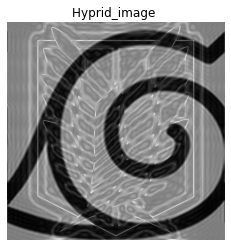

In [51]:
img1= Image.open("images/h11.jpg").convert('L')
img2= Image.open("images/h22.jpg").convert('L')
hybrid=hybrid_image(img1 ,img2)

fig3=plt.figure()
fig3.add_subplot(1,1,1)
plt.imshow(hybrid ,cmap='gray')
plt.axis('off')
plt.title("Hyprid_image ")